# Seaborn Visualisation

### (4) KDE Plot

In [2]:
import pandas as pd
import seaborn as sns

In [4]:
body_df = pd.read_csv('data/body.csv',index_col = 0)

In [5]:
body_df.head()

,Height,Weight
Number,,
1,176.0,85.2
2,175.3,67.7
3,168.6,75.2
4,168.1,67.1
5,175.3,63.0


In [7]:
body_df['Height']

Number
1       176.0
2       175.3
3       168.6
4       168.1
5       175.3
        ...  
996     171.8
997     171.5
998     177.9
999     174.4
1000    173.5
Name: Height, Length: 1000, dtype: float64

In [9]:
body_df['Height'].value_counts()

172.5    13
174.9    13
173.2    12
175.2    12
175.3    12
         ..
163.7     1
185.7     1
184.5     1
176.5     1
184.6     1
Name: Height, Length: 262, dtype: int64

In [11]:
body_df['Height'].value_counts().sort_index()

154.4    1
155.5    1
157.4    1
157.8    1
158.0    1
        ..
190.3    1
191.2    1
191.8    1
192.4    1
193.1    1
Name: Height, Length: 262, dtype: int64

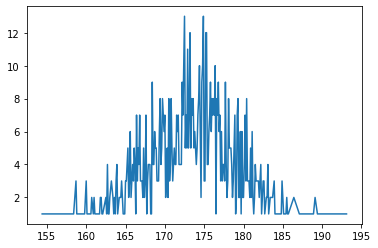

In [13]:
body_df['Height'].value_counts().sort_index().plot()

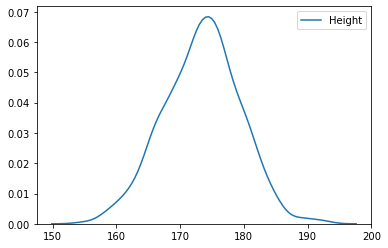

In [15]:
sns.kdeplot(body_df['Height'])

In [16]:
# 이놈은 실제 데이터와는 다르다 (추측을 한 것이기 때문)

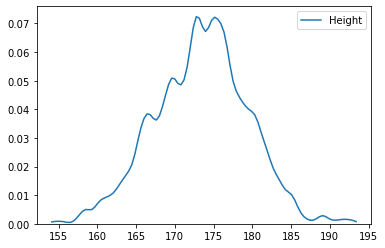

In [21]:
# bw를 통해 추측 정도를 정해줘보자!
sns.kdeplot(body_df['Height'],bw=0.1)

In [22]:
# 적당한 수준의 bw를 찾아줘야 한다 (히스토그램처럼)

### (7) KDE 활용 예시

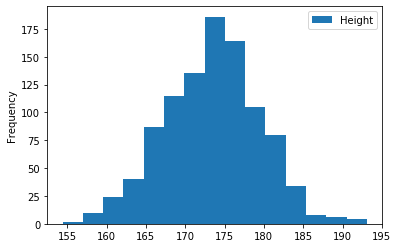

In [26]:
# 히스토 그램
body_df.plot(kind='hist',y='Height',bins = 15)

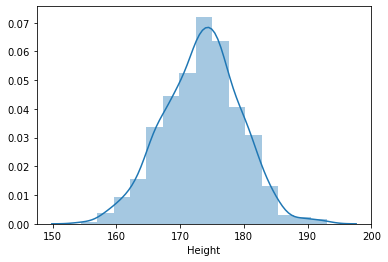

In [28]:
# 히스토그램 위에 KDEplot 얹기!
sns.distplot(body_df['Height'],bins=15)

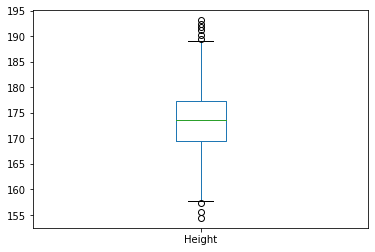

In [31]:
# 박스 플롯
body_df.plot(kind='box',y='Height')

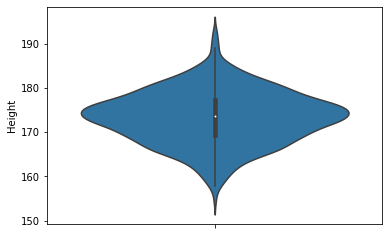

In [32]:
# 분포 전체를 보여준다!
sns.violinplot(y =body_df['Height'])

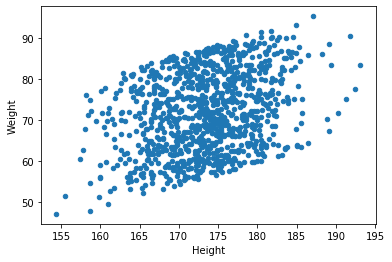

In [41]:
# 키와 몸무게의 연관도!
body_df.plot(kind='scatter',x='Height',y='Weight')

In [42]:
# 가운데 부분에 점이 몰려있다 : 170~175정도가 많다

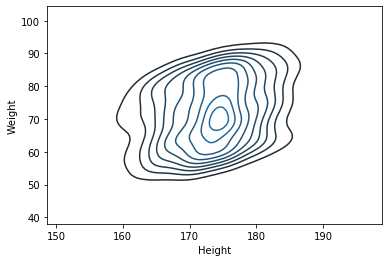

In [43]:
sns.kdeplot(body_df['Height'],body_df['Weight'])

In [44]:
# 등고선을 나타내는 것. 키,몸무게 정보가 3차원으로 나타내진 것이다.
# 머리 속에 그려볼 것!!

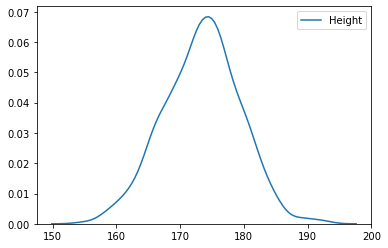

In [45]:
# 키를 보자
sns.kdeplot(body_df['Height'])

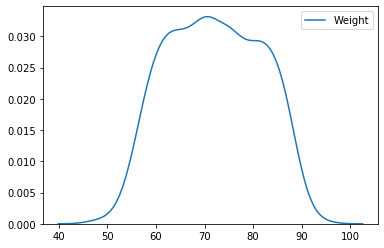

In [46]:
# 몸무게를 보자
sns.kdeplot(body_df['Weight'])

### (10) LM Plot

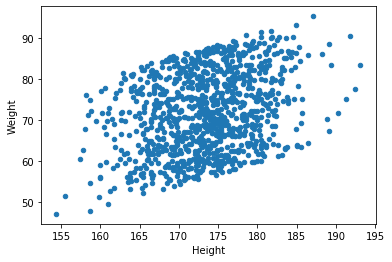

In [47]:
# 키와 몸무게의 연관도!
body_df.plot(kind='scatter',x='Height',y='Weight')

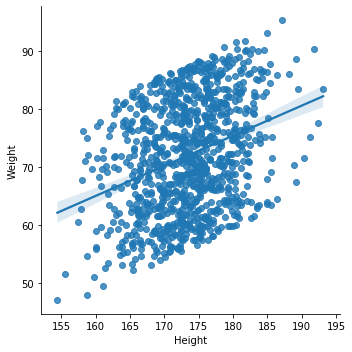

In [49]:
sns.lmplot(data=body_df,x='Height',y='Weight')

In [50]:
# 선 하나가 생겼다 : 회귀선!

### (11) 카테고리별 시각화

In [51]:
laptops_df = pd.read_csv('data/laptops.csv')

In [52]:
laptops_df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [55]:
laptops_df['os']

0        linux
1          mac
2          mac
3          mac
4          mac
        ...   
162    windows
163      linux
164      linux
165      linux
166    windows
Name: os, Length: 167, dtype: object

In [56]:
laptops_df['os'].unique()

array(['linux', 'mac', 'windows'], dtype=object)

In [57]:
# 어떤 OS가 비싼지 알고 싶다!

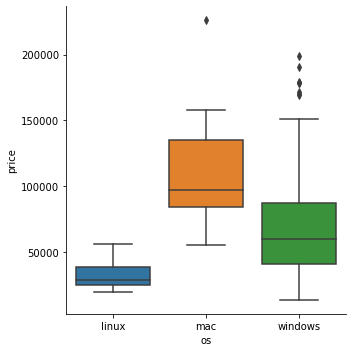

In [60]:
sns.catplot(data=laptops_df,x='os',y='price',kind='box')

In [61]:
# 리눅스가 싸고 MAC이 비싸다!
# MAC이랑 Windows는 리눅스보다 값이 분산되어 있구나!


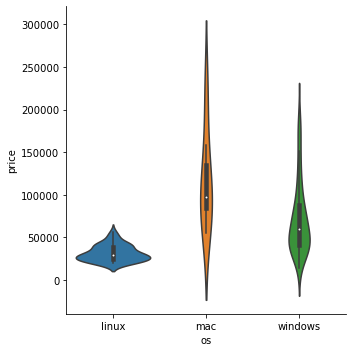

In [62]:
sns.catplot(data=laptops_df,x='os',y='price',kind='violin')

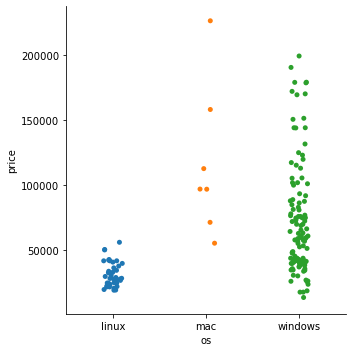

In [66]:
#데이터를 하나하나 볼 수 있도록 : stripplot
sns.catplot(data=laptops_df,x='os',y='price',kind='strip')

In [67]:
laptops_df['processor_brand'].unique()

array(['intel', 'amd'], dtype=object)

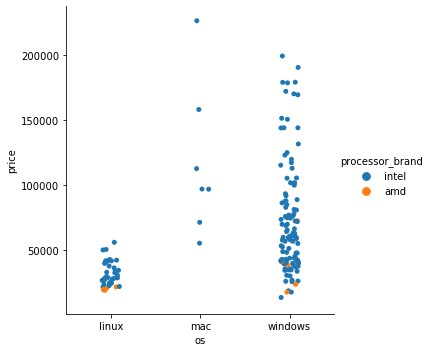

In [69]:
# Hue : 프로세서 브랜드에 따라 색을 다르게 해줘라!
sns.catplot(data=laptops_df,x='os',y='price',kind='strip',hue='processor_brand')

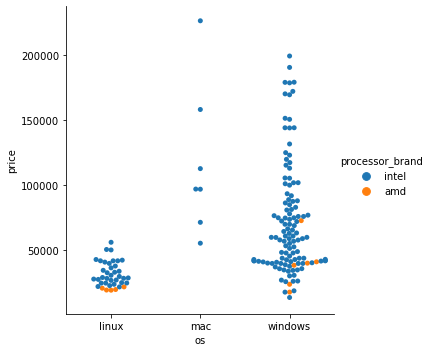

In [71]:
# Swarm 플롯 : 겹쳐진 값들을 펼쳐주는 것
sns.catplot(data=laptops_df,x='os',y='price',kind='swarm',hue='processor_brand')